In [1]:
import imp 
import tree_functions as tree
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import time
import shelve

In [252]:
n = 800
z_range = 6
r = 0.5
r_s = 0.9
mean_gen = 0
sd_gen = 1

ROUND_NUMBER = 6
perc = 0.1

figures_file = 'figures/' 
figures_param = '_n' + str(n) + '_' + 'r' + str(int(r * 100)) + '_' + 'r_s' + \
                str(int(r_s * 100)) + '_.png'

In [231]:
gen_0_par = tree.normal_distribution(n, z_range, mean_gen, sd_gen)

In [232]:
gen_1_par, gen_1_dsct_par = tree.one_1st(gen_0_par, r, r_s, \
                                           above_perc=0.9, below_perc=1.0, population_mean=0)

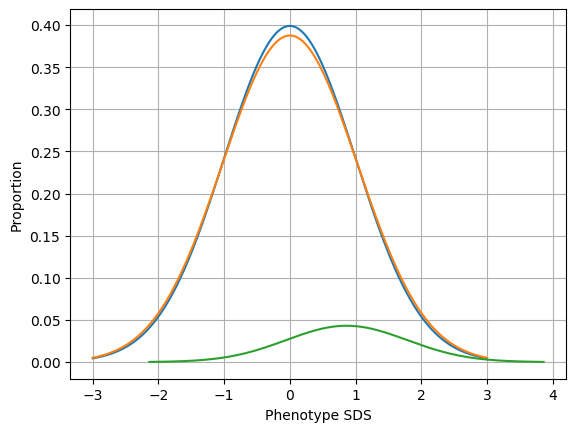

In [233]:
tree.plt_dist(gen_0_par)
tree.plt_dist(gen_1_par)
tree.plt_dist(gen_1_dsct_par)
plt.grid()

In [237]:
gen_1_par[0]

[-3.0,
 0.005048626109829262,
 ['increment', 0.0075],
 ['number', 800],
 ['bound', 6.0],
 ['mean', 0.0],
 ['sd', 1.0223392573746275]]

In [238]:
gen_1_dsct_par[0]

[-2.1375,
 0.00015956026586539553,
 ['increment', 0.0075],
 ['number', 800],
 ['bound', 6.0],
 ['population mean', 0],
 ['sd', 0.9145836417328242]]

In [236]:
# imp.reload(tree)

<module 'tree_functions' from '/Users/jessemurray/Desktop/Tree/tree_functions.py'>

In [289]:
matrix, dsct, gen = tree.destined_dsct_n_gen(gen_1_par, gen_1_dsct_par, r, r_s, n_gen=5, \
                                        perc=0.1, population_mean=0)

In [240]:
matrix

[[[[0.9, 1], 0.3179474211932528],
  [[0.8, 0.9], 0.18866899140916443],
  [[0.7, 0.8], 0.1370149807292047],
  [[0.6, 0.7], 0.10528598761725419],
  [[0.5, 0.6], 0.07998178410945128],
  [[0.4, 0.5], 0.06311491740614854],
  [[0.3, 0.4], 0.046471604546836166],
  [[0.2, 0.3], 0.032723329023689],
  [[0.1, 0.2], 0.02078073555854129],
  [[0.0, 0.1], 0.00801024840645814]],
 [[[0.9, 1], 0.1702764645460903],
  [[0.8, 0.9], 0.1503209224869857],
  [[0.7, 0.8], 0.13360605867129083],
  [[0.6, 0.7], 0.12037484710832856],
  [[0.5, 0.6], 0.10527410429349741],
  [[0.4, 0.5], 0.09493422264848282],
  [[0.3, 0.4], 0.08029741306842975],
  [[0.2, 0.3], 0.06582687502820371],
  [[0.1, 0.2], 0.05066109840094063],
  [[0.0, 0.1], 0.028427993747749715]],
 [[[0.9, 1], 0.11956946424659518],
  [[0.8, 0.9], 0.12435432992001591],
  [[0.7, 0.8], 0.12162173540892816],
  [[0.6, 0.7], 0.11830506638751045],
  [[0.5, 0.6], 0.1077152190928745],
  [[0.4, 0.5], 0.1039382315416932],
  [[0.3, 0.4], 0.09697733727240274],
  [[0.2, 0.

In [166]:
def transpose_matrix(matrix):
    num_gens = len(matrix)
    num_dscts = len(matrix[0])
    
    transposed = list()
    for dsct_num in range(num_dscts - 1, -1, -1):
        sub_transposed = list()
        for gen_num in range(num_gens):
            sub_transposed.append(matrix[gen_num][dsct_num][1])
        transposed.append(sub_transposed)
    return transposed

In [241]:
matrix_transposed = transpose_matrix(matrix)

In [168]:
# matrix_transposed = [ls[:4] for ls in matrix_transposed]

In [264]:
from matplotlib.ticker import PercentFormatter
def plot_multi_mobility(data, pal=None):
    n_dscts = len(data)  # 10
    n_gens = len(data[0])  # 5
    
    plt.figure(figsize=(13, 8))
    if pal is None:
        # pal = ['xkcd:light navy blue', 'xkcd:windows blue', '#1CA3DE', 'xkcd:carolina blue', 'xkcd:light blue']
        pal = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5']
        pal.reverse()
        pal_10 = get_colors()
    
    step_labels = list(range(1, n_gens + 1))

    plt.xlabel('Generation', fontsize=15)
    if n_dscts == 10:
        group_name = 'Decile'
    elif n_dscts == 5:
        group_name = 'Quintile'
        
    plt.ylabel('Likelihood of Descendants in each ' + group_name, fontsize=15)
    plt.ylim(0, 1)
    values_sum_list = [1] * n_gens
    
    for j in range(len(data) - 1, -1, -1):
        if n_dscts <= 5:
            plt.bar(step_labels, [- value for value in data[j]], bottom=values_sum_list, color=pal[j])
        elif n_dscts == 10:
            plt.bar(step_labels, [- value for value in data[j]], bottom=values_sum_list, color=pal_10[j])
        else:
            plt.bar(step_labels, [- value for value in data[j]], bottom=values_sum_list)

        
        for a, b, c in zip(step_labels, values_sum_list, [- value for value in data[j]]):
            num = (b + c / 2) - 0.018
            # plt.text(a, num, ' ' + "{:0.0%}".format(- c), va='bottom', ha='center', color='k', size=15, alpha=0.7)
            
            horz_align = 'center'
#             if abs(c) <= 0.01:
#                 horz_align = 'left'
#             elif abs(c) <= 0.03:
#                 horz_align = 'right'
            if abs(c) >= 0.01:
                if 7 >= j >= 2 :
                    plt.text(a, num, ' ' + "{:0.0%}".format(- c), va='bottom', ha=horz_align, color='k', size=15, alpha=0.8)
                else:
                    plt.text(a, num, ' ' + "{:0.0%}".format(- c), va='bottom', ha=horz_align, color='w', size=15, alpha=0.8)

        for i in range(len(values_sum_list)):
            values_sum_list[i] -= data[j][i]
    
    if n_dscts == 5:
        legend = ['Descendants in\nTop Quintile', 'Fourth Quintile', 'Third Quintile', 'Second Quintile', 'Bottom Quintile']
    elif n_dscts == 10:
        legend = ['Descendants in\nTop Decile', 'Ninth Decile', 'Eighth Decile', 'Seventh Decile',\
                 'Sixth Decile', 'Fifth Decile', 'Fourth Decile', 'Third Decile', 'Second Decile', 'Bottom Decile']
    plt.legend(legend, bbox_to_anchor=(1, 1), loc="upper left", fontsize=15)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.xticks(list(range(1, n_gens + 1)))
#     plt.xticks([1,2,3,4,5], ['Son/Daughter', 'Grand', 'Great', 'Great-great', 'Great-great-great'])

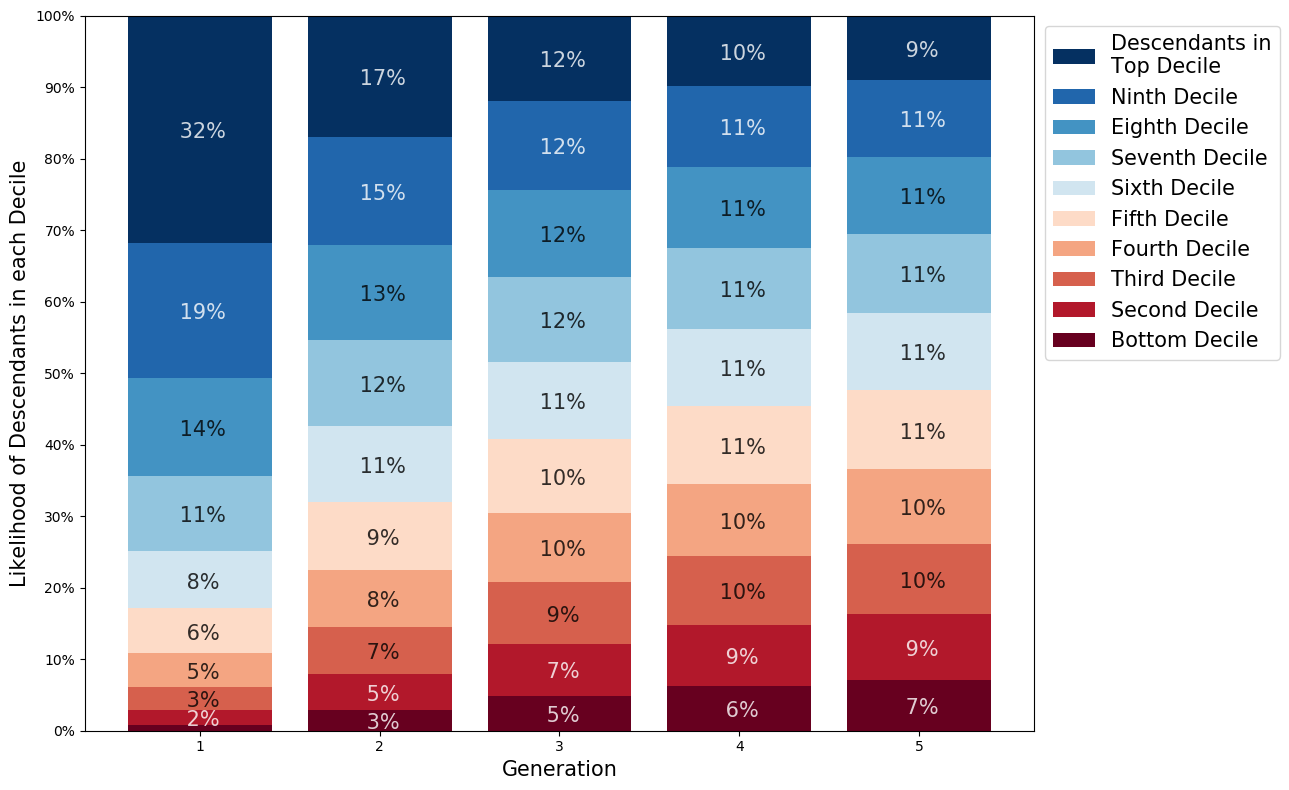

In [265]:
plot_multi_mobility(matrix_transposed)
plt.tight_layout()
# plt.savefig(figures_file + 'matrix_decile' + figures_param, dpi=300)
plt.show()

0.9145836417328242
1.0223392573746275
ratio 1.1178193122256628

0.9397863611785171
1.0442646354060412
ratio 1.1111723669797735

0.9641564896543087
1.0649697515583816
ratio 1.10456109872809

0.988119924727045
1.084266985913045
ratio 1.0973030284887326

1.0114424705880534
1.1020162280610746
ratio 1.089549094591966



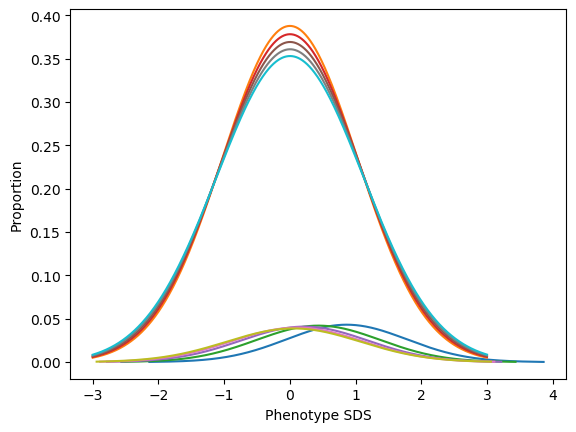

In [288]:
for i in range(len(dsct)):
    print(dsct[i][0][6][1])
    print(gen[i][0][6][1])
    print('ratio', gen[i][0][6][1]/dsct[i][0][6][1])
    print()
    tree.plt_dist(dsct[i])
    tree.plt_dist(gen[i])
# plt.xlim(0,1.5)
# plt.ylim(0, 0.1)

In [266]:
gen_1_par_t, gen_1_dsct_par_t = tree.one_1st(gen_0_par, r, r_s, \
                                           above_perc=0.45, below_perc=0.55, population_mean=0)

In [268]:
tree.dsct_destined(gen_1_par_t, gen_1_dsct_par_t, perc=0.1)

[[[0.9, 1], 0.07416946137861152],
 [[0.8, 0.9], 0.09835536031282285],
 [[0.7, 0.8], 0.10654126218821232],
 [[0.6, 0.7], 0.11175116073155099],
 [[0.5, 0.6], 0.11164968033098524],
 [[0.4, 0.5], 0.11464049704416922],
 [[0.3, 0.4], 0.11074328744698372],
 [[0.2, 0.3], 0.10486553538314802],
 [[0.1, 0.2], 0.09598585011903658],
 [[0.0, 0.1], 0.07129790506447857]]

In [139]:
def get_colors():
    file_colors = open('tree_colors.txt', 'r')
    colors_list = list()
    for line in file_colors:
        colors_list.append(line.strip())
    file_colors.close()
#     colors_list.reverse()
    return colors_list

In [217]:
# d = shelve.open('tree_data')
# d['matrix_n600_z6_g10'] = matrix
# d['dsct_n600_z6_g10'] = dsct
# d['gen_n600_z6_g10'] = gen
# d.close()

In [274]:
# d = shelve.open('tree_data')
# print(d.dict.keys())
# d.close()

[b'gen_n600_z6_g10']


In [278]:
d = shelve.open('tree_data')

In [279]:
d.close()